# AOS_DM-34846 Compensable Image : update mask names

This was needed in `CompensableImage.py` , where things were called `cMask` , `pMask`, and were renamed to be `mask_comp`, `mask_pupil` , because that's how they were defined. Updated methods `getPaddedMask`, `getNonPaddedMask` that now return correctly `mask_comp` (padded) and `mask_pupil` (non-padded).


This triggered a need to change in name `test_compensableImage.py`, although here it didn't really matter which is which (i.e. as far as the test is concerned, `pMask` and `cMask` could have been used interchangeably. 

Then needed to also change `DonutStamp.py` `cMask` to `mask_pupil` (because `cMask` was treated as `non-padded`, whereas in reality it's the padded one), and same for `pMask` (--> `mask_comp` , which was needed from context). 

Also, similar change in  `test_donutStamp` as in `test_compensableImage` (just did `cMask` -- `mask_comp` , etc., since the context did not indicate that they were used the wrong way and it didn't matter for the test) ..


Finally, throughout `Algorithm.py`, the `cMask` was used as the `non-padded` one, so I changed that to `mask_pupil`, and similarly with `pMask` (treated as `padded` mask), which I updated to `mask_comp`. 

This meant that finally we do get a (slightly) different result when using FFT vs EXP, so I changed the two thresholds in `test_algorithm`

Given all these changes, I run the baseline `imgCloseLoop` to test for convergence:

Show the baseline run before `ts_wep` changes (from where refcats were updated):

In [1]:
import sys
sys.path.append('/project/scichris/aos/')
import analysisTools as at


Saved fig as 1.png


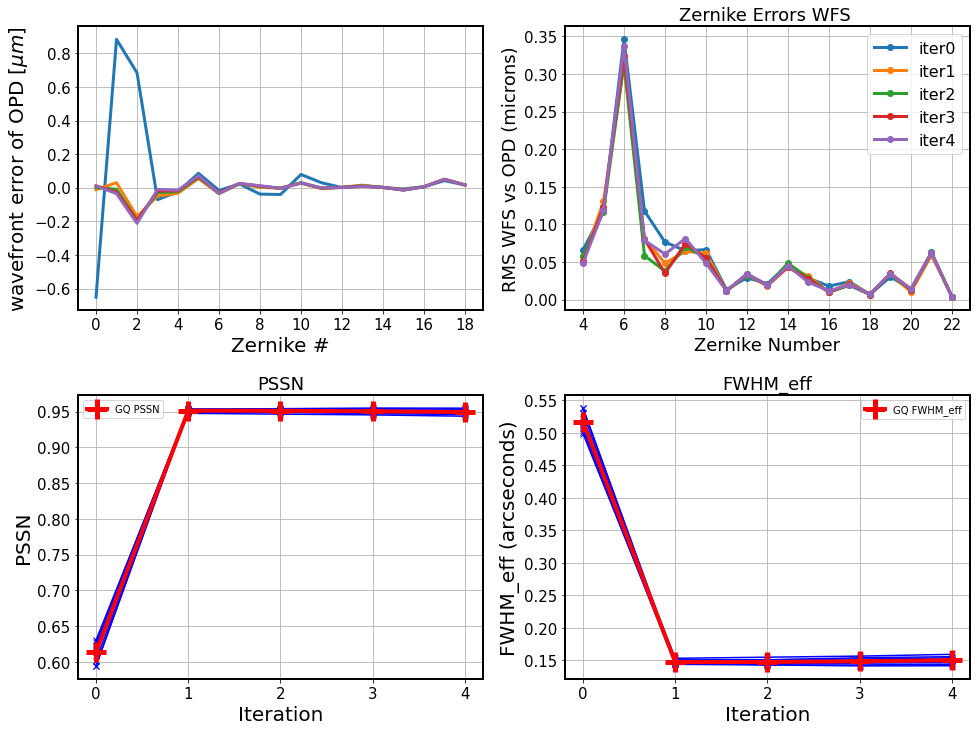

In [2]:
%matplotlib inline
at.plotIterationSummary(data_dir='/project/scichris/aos/refcats_DM-34547/imgCloseLoop2/',
                        iterNum=5
                       )

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}


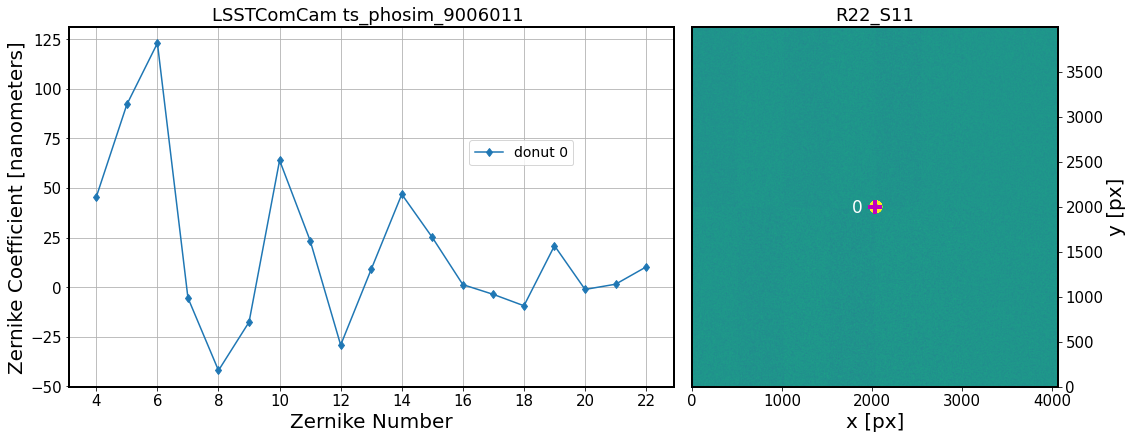

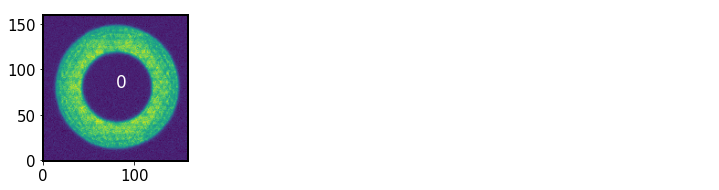

In [11]:
data_dir='/project/scichris/aos/refcats_DM-34547/imgCloseLoop2/'
import os
repoDir = os.path.join(data_dir, 'phosimData')
iterNum=1
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterNum}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= '')


Plot the results of running the `imgCloseLoop` after changes in `compensableImage.py` as well as `Algorithm.py`:

Saved fig as 1.png


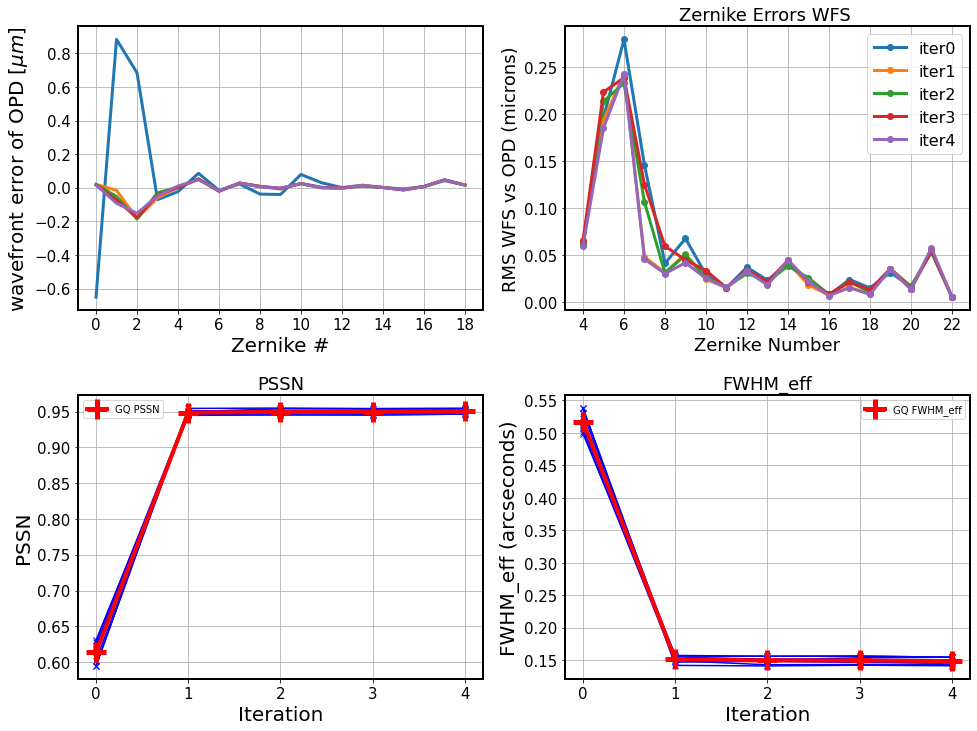

In [2]:
%matplotlib inline
at.plotIterationSummary(data_dir='/project/scichris/aos/compensable_DM-34846/imgCloseLoop/',
                        iterNum=5
                       )

Show the donut images: what do they look like

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}


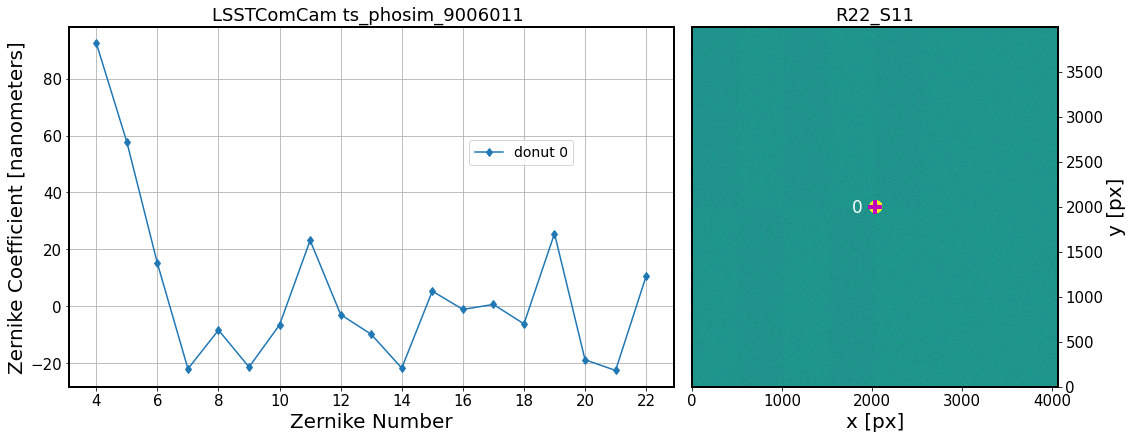

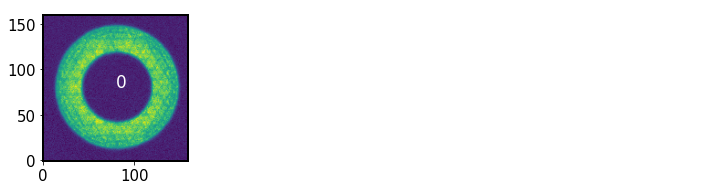

In [8]:
data_dir = '/project/scichris/aos/compensable_DM-34846/imgCloseLoop/'
import os
repoDir = os.path.join(data_dir, 'phosimData')
iterNum=1
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterNum}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= '')


Also, I show in `AOS_DM-34846_CompensableImage_ts_wep` notebook that now the `mask_comp` is the padded mask, and `mask_pupil` is the non-padded mask (by changing the `boundaryT` parameter)

Lets undo all changes to `Algorithm.py`, and see if I have introduced any problems whatsoever. After all, the masks from  `compensableImage` are only accessed via `getPaddedMask` , `getNonPaddedMask` (much more descriptive than `cMask` and `pMask`,), and since I  corrected what these functions return, it should be working fine now 

First, I restore `Algorithm.py` to before changes.
    
The last commit before the first commit of the branch:  
    
    git rebase -i b672fa2b

I get 

    pick 63e473b change cMask --> mask_comp, pMask --> mask_pupil, update docstring
    pick 53a1c9f change cMask --> mask_pupil, pMask-->mask_comp, given the context
    pick 0addf74 change mask_c --> mask_pupil, mask_p --> mask_comp '
    pick eef8abd change mask_c --> mask_comp
    pick 2be8774 update algorithm test
    pick d0bc23e change pMask --> mask_comp, cMask --> mask_pupil

I edit that to

    pick 63e473b change cMask --> mask_comp, pMask --> mask_pupil, update docstring
    s 53a1c9f change cMask --> mask_pupil, pMask-->mask_comp, given the context
    s 0addf74 change mask_c --> mask_pupil, mask_p --> mask_comp '
    s eef8abd change mask_c --> mask_comp
    s 2be8774 update algorithm test
    s d0bc23e change pMask --> mask_comp, cMask --> mask_pupil
    
Then I do 

    git reset --soft HEAD~1
    git reset HEAD -- .
    
Somehow I also had to do 

    git restore --staged ../task/DonutStamp.py
    git restore --staged tests/cwfs/test_algorithm.py
    git restore --staged tests/cwfs/test_compensableImage.py
    git restore --staged tests/task/test_donutStamp.py
    
To remove everything from staged area, so that `git status` yields

    Changes not staged for commit:
      (use "git add <file>..." to update what will be committed)
      (use "git restore <file>..." to discard changes in working directory)
        modified:   python/lsst/ts/wep/cwfs/Algorithm.py
        modified:   python/lsst/ts/wep/cwfs/CompensableImage.py
        modified:   python/lsst/ts/wep/task/DonutStamp.py
        modified:   tests/cwfs/test_algorithm.py
        modified:   tests/cwfs/test_compensableImage.py
        modified:   tests/task/test_donutStamp.py


    
Now I do one by one :
    
    git add tests/task/test_donutStamp.py
    git commit -m 'update cMask, pMask in test_donutStamp'
    
    git add  tests/cwfs/test_compensableImage.py
    git commit -m 'update cMask, pMask in test_compensableImage'
    
    git add python/lsst/ts/wep/task/DonutStamp.py
    git commit -m 'update cMask, pMask in  DonutStamp'
    
    git add python/lsst/ts/wep/cwfs/CompensableImage.py
    git commit -m 'update cMask, pMask in  CompensableImage'
    
next : Algorithm and test_algorithm 
    
But I do 

    git restore python/lsst/ts/wep/cwfs/Algorithm.py
    
To see if any changes I have done messed anything up. 

I run in that state another `imgCloseLoop` baseline simulation; to `imgCloseLoop2` 



after that, do 


    mv changed_Algorithm.py Algorithm.py    

and git add Algorithm.py .... (assuming the changes I've done were good). Otherwise, can do changes in Algorithm.py more by hand ;
                               or even just do them again, and see if they agree with those changes I've done previously in changed_Algorithm.py

Saved fig as 1.png


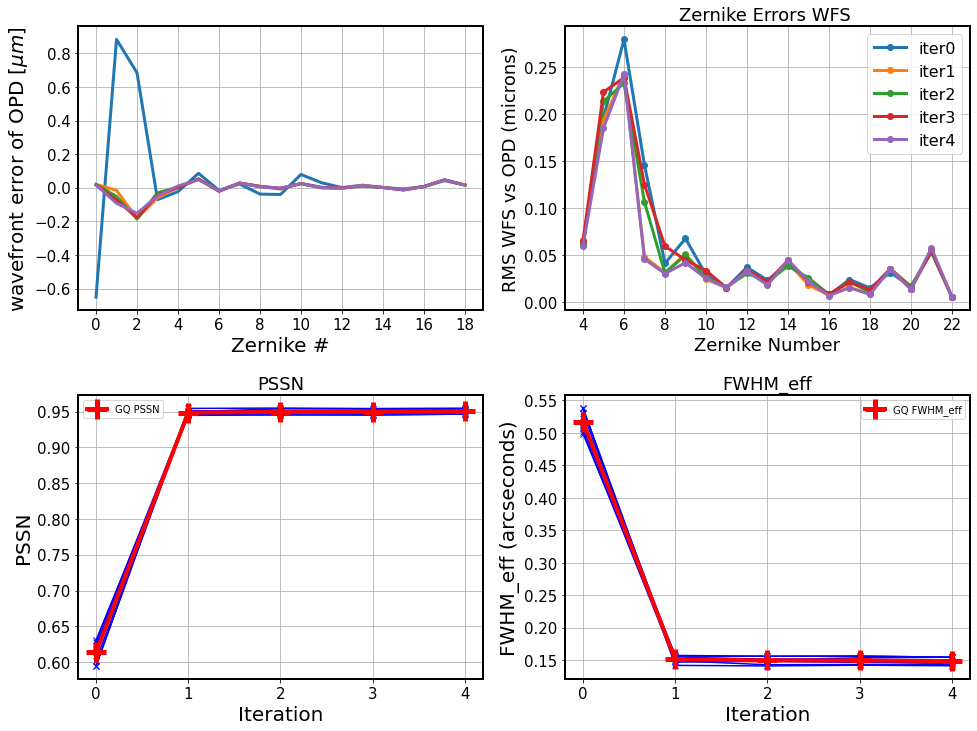

In [2]:
%matplotlib inline
at.plotIterationSummary(data_dir='/project/scichris/aos/compensable_DM-34846/imgCloseLoop2/',
                        iterNum=5
                       )

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}


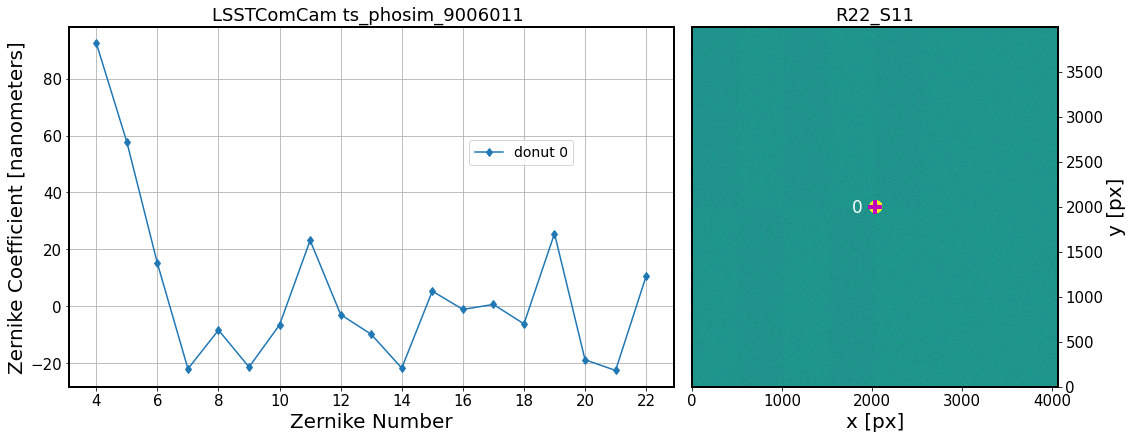

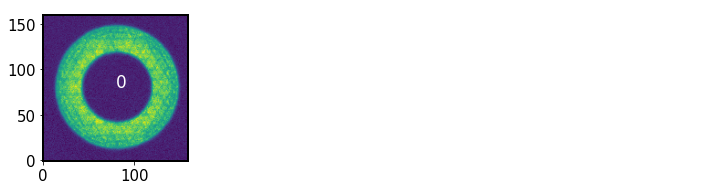

In [3]:
data_dir = '/project/scichris/aos/compensable_DM-34846/imgCloseLoop/'
import os
repoDir = os.path.join(data_dir, 'phosimData')
iterNum=1
at.plotZernikeImage(repoDir=repoDir,
                   collection=f'ts_phosim_90060{iterNum}1',
                   instrument='LSSTComCam',
                   detector='R22_S11',
                   titleAdd= '')


Compare the two (before and after changes to Algorithm.py)  - they **should** be identical since the changes are semantic (and we're using exp algorithm by default which is not using very much the padded mask). 



In [6]:
from lsst.daf import butler as dafButler
iterNum=1
collection=f'ts_phosim_90060{iterNum}1'
instrument='LSSTComCam'
detector='R22_S11'

res = {}
count = 0
for suffix in ['', 2]:
    data_dir = f'/project/scichris/aos/compensable_DM-34846/imgCloseLoop{suffix}/'
    repoDir = os.path.join(data_dir, 'phosimData')
    

    # read in the data from the butler 
    butler = dafButler.Butler(repoDir)
    registry = butler.registry

    dataId0 = dict(instrument=instrument)
    dataset = next(iter(butler.registry.queryDatasets(
                        datasetType='postISRCCD',
                        dataId=dataId0, 
                        collections=[collection]  )))

    expN = dataset.dataId["exposure"]

    # construct a dataId  for postISR 
    dataId = {'detector':detector, 'instrument':instrument,
              'exposure':expN}
    print(dataId)
    
    # read the postISR exposure 
    postIsrExp = butler.get('postISRCCD', dataId,
               collections=[collection])

    # construct a dataId for zernikes and donut catalog:
    # switch exposure to visit 
    dataId = {'detector':detector, 'instrument':instrument,
              'visit':expN}
    print(dataId)
    
    # the raw Zernikes 
    zkRaw =  butler.get('zernikeEstimateRaw', dataId=dataId,
                        collections=[collection])
    
    # store them in dic
    res[count] = zkRaw
    count += 1 

{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'exposure': 4021123106011}
{'detector': 'R22_S11', 'instrument': 'LSSTComCam', 'visit': 4021123106011}


In [11]:
import numpy as np 
np.sum(res[0]-res[1])

0.0

Ok, the results are bitwise identical. Good! 

Also, checked whether the `CompensableImage` after changes produces the same results as before when analyzing auxTel data - done that in `ts_analysis_notebooks/notebooks/auxtel/AOS_DM-33168_validate_AT_with_batoid.ipynb`



Check what the `test_multImgs` did before (and why the result is now different)... 

In [1]:
import os
import time
import numpy as np
from lsst.ts.wep.cwfs.BaseCwfsTestCase import BaseCwfsTestCase
from lsst.ts.wep.Utility import getModulePath, CamType, CentroidFindType

import yaml
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import rcParams 

rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18


In [2]:
modulePath = getModulePath()
imageFolderPath = os.path.join(
    modulePath, "tests", "testData", "testImages"
)
validationDir = os.path.join(
    modulePath, "tests", "testData", "testImages", "validation", "simulation"
)

In [13]:
# test case 1 
imageFolderName="LSST_NE_SN25"
baseImageName="z11_0.25"
fieldXY=(1.185, 1.185)
algoName="exp"
opticalModel="offAxis"

def _calcWfErrAndCompareWithAns(
       imageFolderName, baseImageName, fieldXY, algoName, opticalModel
    ):
    
    imageFileIntra = os.path.join(
       imageFolderPath, imageFolderName, f"{baseImageName}_intra.txt"
    )
    imageFileExtra = os.path.join(
       imageFolderPath, imageFolderName, f"{baseImageName}_extra.txt"
    )


    testCase = BaseCwfsTestCase()

    wfErr = testCase.calcWfErr(
    CentroidFindType.RandomWalk,
    fieldXY,
    CamType.LsstCam,
    algoName,
    1.0,
    opticalModel,
    imageFileIntra=imageFileIntra,
    imageFileExtra=imageFileExtra,
    )
    # Get the answer of wavefront error
    ansFileName = f"{imageFolderName}_{baseImageName}_{algoName}.txt"
    ansFilePath = os.path.join(validationDir, ansFileName)
    wfErrAns = np.loadtxt(ansFilePath)

    return wfErr, wfErrAns

def compare_results(wfErr, wfErrAns, addTitle=''):
    fig,ax = plt.subplots(1,1)
    ax.plot(np.arange(4, 23), wfErr ,'-d', label='fit')
    ax.plot(np.arange(4, 23), wfErrAns ,'-o',label='answer')
    ax.legend()
    ax.set_title(addTitle)
    ax.set_ylabel('Zk value [nm]')
    #rect = l, b, w, h
    ax2 = fig.add_axes((0.12, 0 , 0.78, 0.1))
    ax2.plot(np.arange(4, 23), wfErr-wfErrAns, '-d',)
    ax2.set_ylabel(r'$\Delta$')


    diffMax = np.max(np.abs(wfErr - wfErrAns))

    diffRms = np.sqrt(np.sum(np.abs(wfErr - wfErrAns) ** 2) / len(wfErr))
    print(f'diffMax={diffMax}')
    print(f'diffRms={diffRms}')

diffMax=0.19989984250222292
diffRms=0.06138899201174074


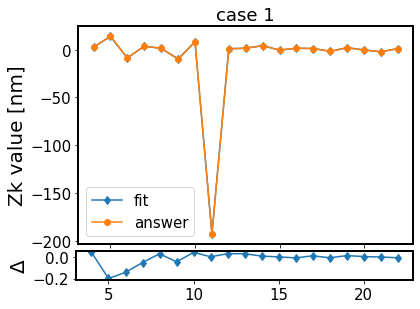

In [55]:
# case 1
wfErr, wfErrAns = _calcWfErrAndCompareWithAns("LSST_NE_SN25", "z11_0.25", (1.185, 1.185), "exp", "offAxis")
compare_results(wfErr, wfErrAns, addTitle='case 1')

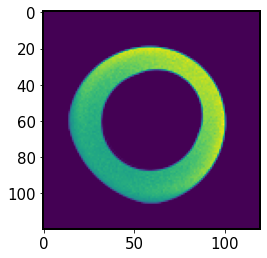

In [15]:
plt.imshow(np.loadtxt(imageFileExtra))

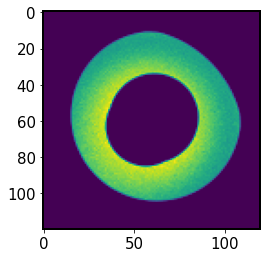

In [14]:
plt.imshow(np.loadtxt(imageFileIntra))

/project/scichris/aos/ts_wep/python/lsst/ts/wep/cwfs/Algorithm.py:940: RuntimeWarning: invalid value encountered in true_divide
  tmp /= convolve2d(ApringIn, kernel, mode="same")


diffMax=8.204150386516359
diffRms=2.6010964873923856


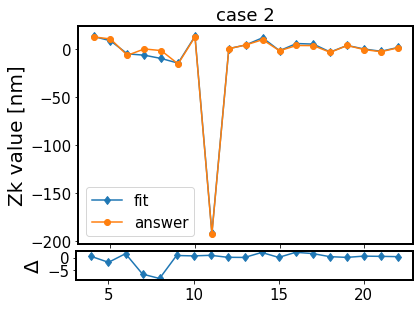

In [56]:
# case 2
wfErr, wfErrAns=_calcWfErrAndCompareWithAns("LSST_NE_SN25", "z11_0.25", (1.185, 1.185), "fft", "offAxis")
compare_results(wfErr, wfErrAns, addTitle='case 2')

diffMax=4.17511007878872
diffRms=1.3250028259370885


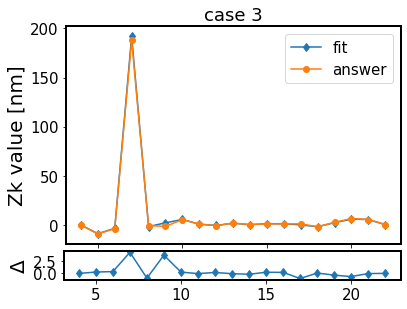

In [57]:
# case 3
wfErr, wfErrAns=_calcWfErrAndCompareWithAns("F1.23_1mm_v61", "z7_0.25", (0, 0), "fft", "paraxial")
compare_results(wfErr, wfErrAns, addTitle='case 3')

diffMax=6.656576112894669
diffRms=1.6361549057756952


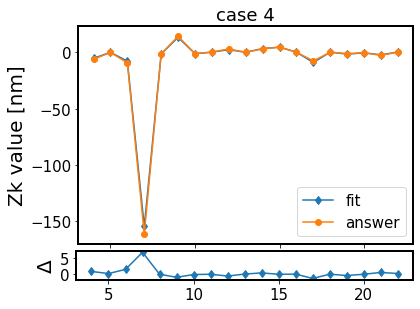

In [58]:
#case 4
wfErr, wfErrAns=_calcWfErrAndCompareWithAns("LSST_C_SN26", "z7_0.25", (0, 0), "fft", "onAxis")
compare_results(wfErr, wfErrAns, addTitle='case 4')


diffMax=0.5043485805677346
diffRms=0.16991696807528342


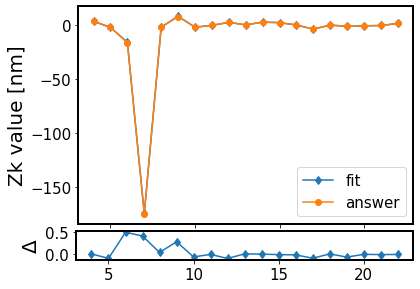

In [52]:
#case5 
wfErr, wfErrAns=_calcWfErrAndCompareWithAns("LSST_C_SN26", "z7_0.25", (0, 0), "exp", "onAxis")
compare_results(wfErr, wfErrAns, addTitle='case 5')

They are similar (very), but the problem is I don't know what were the input values (it should be the values from "validation", "simulation"), but are they? 



Simulate some donuts with batoid. That way we know exactly what was the input (following an example in https://github.com/jfcrenshaw/donut-sims/blob/main/notebooks/one_intra_and_extra.ipynb )

In [60]:
! pip install batoid

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.6/242.6 kB 3.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for batoid: filename=batoid-0.3.7-cp310-cp310-linux_x86_64.whl size=4563746 sha256=e1c1017223136cca82d81bbdb8b4e4bd057ee755ec36a352d3e8092d3aa1dca9
  Stored in directory: /home/scichris/.cache/pip/wheels/fc/33/fb/2fe3c313caf0ad41de76b1525d1e86e37c29830453ff9ec10a
Successfully built batoid


In [1]:
import sys
sys.path.append('/project/scichris/aos/wfsim/')
import batoid
import galsim
import wfsim

import numpy as np
import matplotlib.pyplot as plt

In [33]:
np.linspace(0,100,5)

array([  0.,  25.,  50.,  75., 100.])

In [40]:
# some initial setup
# we'll do r-band for this demo
bandpass = galsim.Bandpass("LSST_r.dat", wave_type="nm")
telescope = batoid.Optic.fromYaml("LSST_r.yaml")
pixel_scale = 10e-6 # meters / pixel

# setup observation parameters
# these are plausible numbers from Josh
observation = {
    "zenith": 30 * galsim.degrees,
    "raw_seeing": 0.7 * galsim.arcsec, # zenith 500nm seeing
    "wavelength": bandpass.effective_wavelength, # nm
    "exptime": 15.0, # seconds
    "temperature": 293.0, # Kelvin
    "pressure": 69.0, # kPa
    "H2O_pressure": 1.0, # kPa
}

# setup atmospheric parameters
atm_kwargs = {
    "screen_size": 819.2,
    "screen_scale": 0.1,
    "nproc": 6, # create sceens in parallel using this many CPUs
}

# We loaded the fiducial telescope - now let's perturb it out of alignment
# and misfigure the mirrors a little bit

# the big question is how much to perturb each degree-of-freedom
# for this demo, we will not dwell on this too much

# run five different random seeds
for seed in np.random.randint(0,100,5):

    rng = np.random.default_rng(seed)

    # Now we'll perturb the main mirror
    # we should use actual mirror modes, but for now, we'll just use Zernikes
    M1M3_modes = rng.uniform(-1e-1, +1e-1, size=23) # waves
    M1M3_modes *= bandpass.effective_wavelength * 1e-9 # meters

    M1M3_surface_perturbation = batoid.Zernike(
        M1M3_modes,
        R_outer=telescope["M1"].obscuration.original.outer,
    )

    perturbed = telescope.withSurface(
        "M1",
        batoid.Sum([
            telescope["M1"].surface,
            M1M3_surface_perturbation,
        ])
    )
    perturbed = perturbed.withSurface(
        "M3",
        batoid.Sum([
            telescope["M3"].surface,
            M1M3_surface_perturbation,
        ])
    )

    # M2 bends independently from M1M3
    M2_modes = rng.uniform(-1e-1, +1e-1, size=23) # waves
    M2_modes *= bandpass.effective_wavelength * 1e-9 # meters

    M2_surface_perturbation = batoid.Zernike(
        M2_modes,
        R_outer=telescope["M2"].obscuration.original.outer,
    )
    perturbed = perturbed.withSurface(
        "M2",
        batoid.Sum([
            telescope["M2"].surface,
            M2_surface_perturbation,
        ])
    )

    # To make donuts, we need to be intra-focal or extra-focal.
    # To simulate normal science operations mode, shift the detector:
    intra = perturbed.withGloballyShiftedOptic(
        "Detector", [0, 0, -1.5e-3]
    )
    extra = perturbed.withGloballyShiftedOptic(
        "Detector", [0, 0, +1.5e-3]
    )

    intra_simulator = wfsim.SimpleSimulator(
        observation,
        atm_kwargs,
        intra,
        bandpass,
        shape=(160, 160),
        rng=rng
    )


    extra_simulator = wfsim.SimpleSimulator(
        observation,
        atm_kwargs,
        extra,
        bandpass,
        shape=(160, 160),
        rng=rng
    )

    # Now we can choose some parameters for a star and start simulating
    # First, choose a field angle.  At the moment, the simulator code only 
    # works close to the boresight direction, so just use that.  I'll 
    # extend that soon.
    thx = np.deg2rad(0)
    thy = np.deg2rad(0)

    # We also want to simulate chromatically.  We could fetch an actual 
    # stellar SED for this, but it's easier and probably always good enough
    # to just use a black body with a reasonable temperature.
    star_T = rng.uniform(4000, 10000)
    sed = wfsim.BBSED(star_T)

    # We also need a flux (which needs to be an integer):
    flux = rng.integers(1_000_000, 2_000_000)

    intra_simulator.add_star(thx, thy, sed, flux, rng)
    extra_simulator.add_star(thx, thy, sed, flux, rng)


    # Finally, what were the actual Zernike's for the perturbed telescope
    # we generated?  Get that using batoid.zernike:
    zs = batoid.zernike(
        perturbed, 
        thx, thy, 
        bandpass.effective_wavelength*1e-9  # batoid wants meters,
    )
    zs *= bandpass.effective_wavelength # waves -> nm

    # save the intra/extra images and results
    np.savez(
    f"one_intra_and_extra_seed{seed}.npz", 
    intra=intra_simulator.image.array,
    extra=extra_simulator.image.array,
    zernikes=zs,
)

In [24]:
def plot_intra_extra(intra,extra):

    fig, ax = plt.subplots(1, 3, dpi=120, )#constrained_layout=True)

    ax[0].imshow(extra, origin="lower")
    ax[0].set_title("Extra", color="w")
    
    ax[1].imshow(intra, origin="lower")
    ax[1].set_title("Intra", color="w")

    ax[2].imshow(extra - intra, origin="lower")
    ax[2].set_title("Extra - Intra", color="w")

    ax[2].set( yticks=[])
    ax[1].set( yticks=[])

    plt.show()

In [3]:
import os
files = os.listdir()
l = []
for file in files:
    if file.startswith('one_intra_and_extra_seed'):
        l.append(file)

In [46]:
l

['one_intra_and_extra_seed37.npz',
 'one_intra_and_extra_seed78.npz',
 'one_intra_and_extra_seed91.npz',
 'one_intra_and_extra_seed7.npz',
 'one_intra_and_extra_seed44.npz']

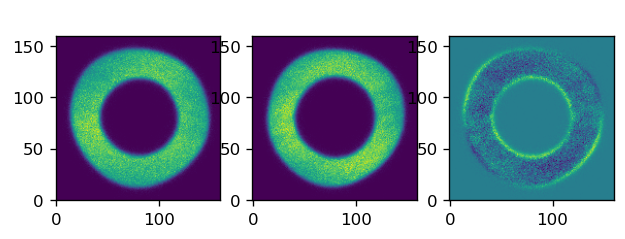

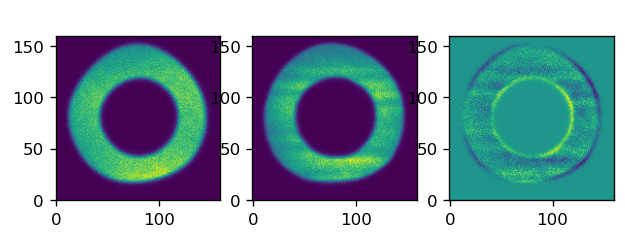

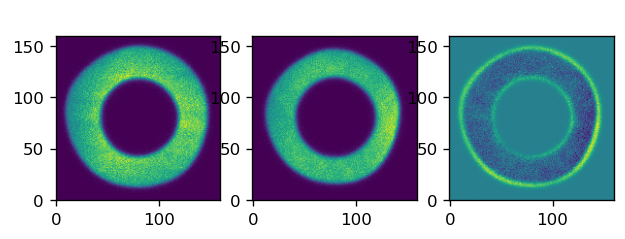

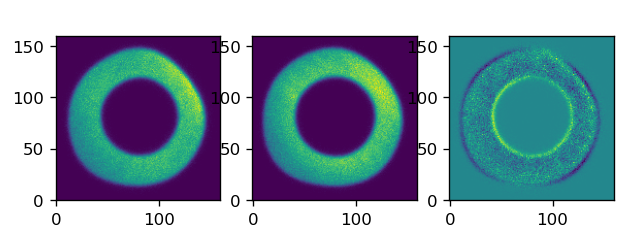

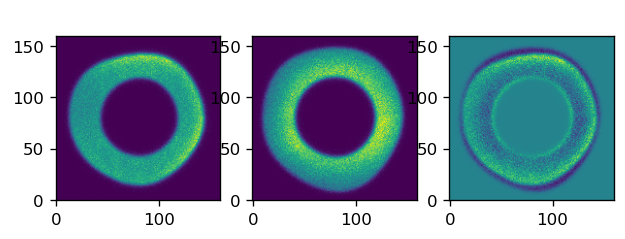

In [49]:
for f in l:
    npz = np.load(f)
    plot_intra_extra(npz['intra'],npz['extra'])

Fit all 5 batoid simulations, with both algorithms:

In [1]:
# get the file list 
import os
files = os.listdir()
l = []
for file in files:
    if file.startswith('one_intra_and_extra_seed'):
        l.append(file)

In [3]:
from lsst.ts.wep.cwfs.BaseCwfsTestCase import BaseCwfsTestCase
from lsst.ts.wep.Utility import getModulePath, CamType, CentroidFindType
import numpy as np

testCase = BaseCwfsTestCase() 

fieldXY=(0,0)
#algoName="exp"
announcedDefocalDisInMm=1.5
opticalModel="offAxis"

res = {}
for f in l:
    res[f] = {}
    npz = np.load(f)
    intra = npz['intra']
    extra = npz['extra']
    
    for algoName in ['exp','fft']:
        wfErr = testCase.calcWfErr(
        CentroidFindType.RandomWalk,
        fieldXY,
        CamType.LsstCam,
        algoName,
        announcedDefocalDisInMm,
        opticalModel,
        imageIntra=intra,
        imageExtra=extra,
        )
        res[f][algoName] = wfErr

/project/scichris/aos/ts_wep/python/lsst/ts/wep/cwfs/Algorithm.py:940: RuntimeWarning: invalid value encountered in true_divide
  tmp /= convolve2d(ApringIn, kernel, mode="same")


store the result for `DM-38486` (compensable updated) branch, as well as `develop, v_2.4.4`:

In [38]:
#np.save('batoid_fit_DM-34846.npy',res)


In [5]:
np.save('batoid_fit_develop_v2-4-4.npy',res)

Plot the comparison between the fit and the result:

In [8]:
def compare(wfErr, wfErrAns):
    fig,ax = plt.subplots(1,1)
    ax.plot(np.arange(4, 23), wfErr['fft'] ,'-d', label='fit fft')
    ax.plot(np.arange(4, 23), wfErr['exp'] ,'-d', label='fit exp')
    ax.plot(np.arange(4, 23), wfErrAns ,'-o',label='answer')
    ax.legend()
    addTitle = 'fitting batoid simulation'
    ax.set_title(addTitle)
    ax.set_ylabel('Zk value [nm]')
    #rect = l, b, w, h
    
    for algo in wfErr.keys():
        wfErrFit = wfErr[algo]
        diffMax = np.max(np.abs(wfErrFit - wfErrAns))
        diffRms = np.sqrt(np.sum(np.abs(wfErrFit - wfErrAns) ** 2) / len(wfErrFit))
        print(f'{algo} diffMax={diffMax}')
        print(f'{algo} diffRms={diffRms}')



one_intra_and_extra_seed37.npz
exp diffMax=409.7489525945269
exp diffRms=120.18038168984651
fft diffMax=422.7472588913792
fft diffRms=125.67517621813779


one_intra_and_extra_seed78.npz
exp diffMax=220.05501552419975
exp diffRms=93.79430910094842
fft diffMax=243.7909546179513
fft diffRms=104.15936278080933


one_intra_and_extra_seed91.npz
exp diffMax=464.3505505879631
exp diffRms=131.29287011137814
fft diffMax=449.9628855375029
fft diffRms=132.47038572709425


one_intra_and_extra_seed7.npz
exp diffMax=297.27620574556795
exp diffRms=106.01911624304101
fft diffMax=330.9446115555762
fft diffRms=109.41998313380122


one_intra_and_extra_seed44.npz
exp diffMax=470.01544874602723
exp diffRms=167.26597884593744
fft diffMax=459.48167437684214
fft diffRms=182.2893017178318


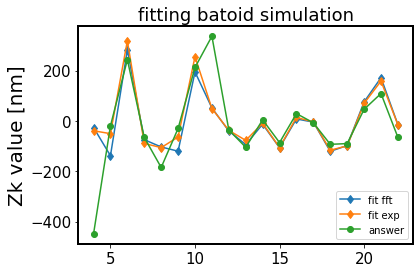

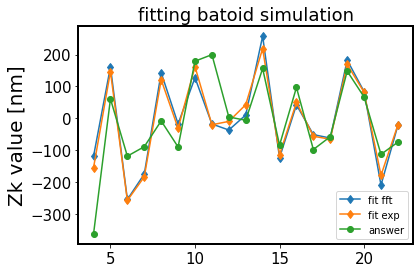

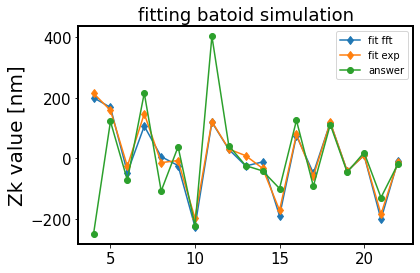

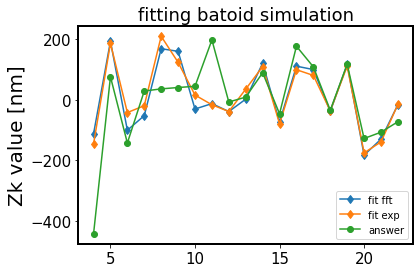

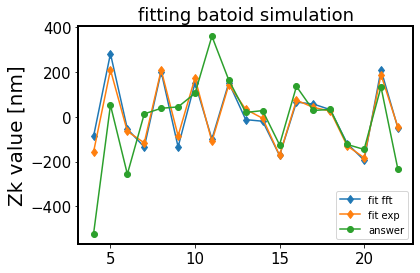

In [9]:
# plot the "before" comparison v2.4.4 on develop
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import rcParams 

rcParams['ytick.labelsize'] = 15
rcParams['xtick.labelsize'] = 15
rcParams['axes.labelsize'] = 20
rcParams['axes.linewidth'] = 2
rcParams['font.size'] = 15
rcParams['axes.titlesize'] = 18

res = np.load('batoid_fit_develop_v2-4-4.npy', allow_pickle=True).item(
)
for f in l:
    npz = np.load(f)
    print('\n')
    print(f)
    compare(res[f] , npz['zernikes'][4:] )



one_intra_and_extra_seed37.npz
exp diffMax=409.7489525945269
exp diffRms=120.18038168984651
fft diffMax=428.5251696663758
fft diffRms=125.47973154566392


one_intra_and_extra_seed78.npz
exp diffMax=220.05501552419975
exp diffRms=93.79430910094842
fft diffMax=262.0350065860233
fft diffRms=106.66075799412101


one_intra_and_extra_seed91.npz
exp diffMax=464.3505505879631
exp diffRms=131.29287011137814
fft diffMax=454.84877196104406
fft diffRms=136.09934024782746


one_intra_and_extra_seed7.npz
exp diffMax=297.27620574556795
exp diffRms=106.01911624304101
fft diffMax=326.05309980609286
fft diffRms=105.15765324456943


one_intra_and_extra_seed44.npz
exp diffMax=470.01544874602723
exp diffRms=167.26597884593744
fft diffMax=450.9687856080021
fft diffRms=169.11286436765


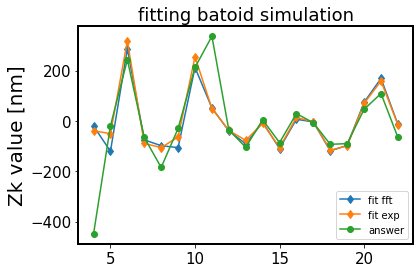

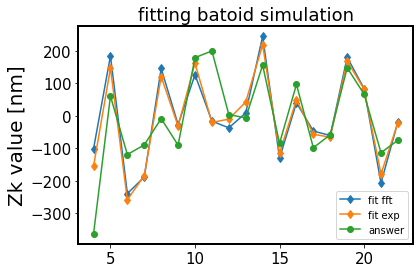

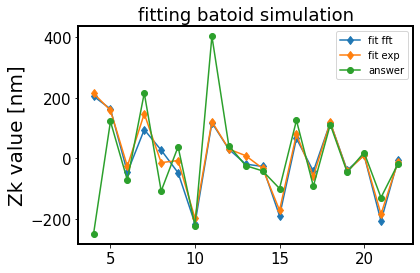

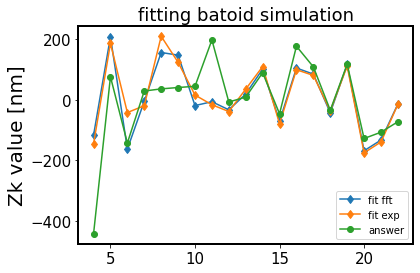

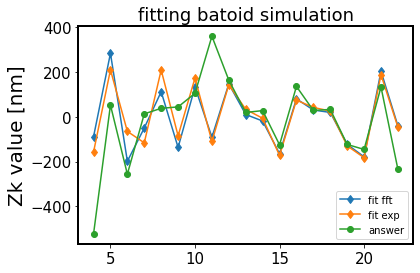

In [10]:
# plot the "after" comparison
res = np.load('batoid_fit_DM-34846.npy', allow_pickle=True).item(
)
for f in l:
    npz = np.load(f)
    print('\n')
    print(f)
    compare(res[f] , npz['zernikes'][4:] )

# Compare against wfsim "demo on-axis"

In [1]:
#%matplotlib widget
import sys
sys.path.append('/project/scichris/aos/wfsim/')
import os
import numpy as np
import yaml
from tqdm.notebook import tqdm
import galsim
import batoid
import wfsim
import matplotlib.pyplot as plt

from lsst.ts.wep.cwfs.Algorithm import Algorithm
from lsst.ts.wep.cwfs.CompensableImage import CompensableImage
from lsst.ts.wep.cwfs.Instrument import Instrument
from lsst.ts.wep.Utility import (
    CamType,
    DefocalType,
    getConfigDir,
    getModulePath
)

So we're not right there, but pretty close... Try using a slightly different simulation code as mentioned in this message https://lsstc.slack.com/archives/C9BEJU1T3/p1651597799754239?thread_ts=1650659065.871639&cid=C9BEJU1T3 from https://github.com/jmeyers314/wfsim/blob/perturbations/notebooks/ts_wep%20demo%20on-axis.ipynb : 

In [17]:
# these are the same for each sim 
bandpass = galsim.Bandpass("LSST_r.dat", wave_type='nm')
fiducial_telescope = batoid.Optic.fromYaml("LSST_r.yaml")
factory = wfsim.SSTFactory(fiducial_telescope)
pixel_scale = 10e-6

# Setup observation parameters.  Making ~plausible stuff up.
observation = {
    'zenith': 30 * galsim.degrees,
    'raw_seeing': 0.7 * galsim.arcsec,  # zenith 500nm seeing
    'wavelength': bandpass.effective_wavelength,
    'exptime': 15.0,  # seconds
    'temperature': 293.,  # Kelvin
    'pressure': 69.,  #kPa
    'H2O_pressure': 1.0  #kPa
}

# Setup atmospheric parameters
atm_kwargs = {
    'screen_size': 819.2,
    'screen_scale': 0.1,
    'nproc': 6  # create screens in parallel using this many CPUs
}

dof = np.zeros(50)
# dof[40:44] = 0.2  # activate some M2 bending modes
dof = rng.normal(scale=0.05, size=50)
# but zero-out the hexafoil modes that aren't currently fit well.
dof[[28, 45, 46]] = 0
telescope = factory.get_telescope(dof=dof)  # no perturbations yet

intra = telescope.withGloballyShiftedOptic("Detector", [0, 0, -0.0015])
extra = telescope.withGloballyShiftedOptic("Detector", [0, 0, +0.0015])

# this depends  on the seed 
def run_wfsim_pert_simulation(seed):
    rng = np.random.default_rng(seed)
    intra_simulator = wfsim.SimpleSimulator(
        observation,
        atm_kwargs,
        intra,
        bandpass,
        shape=(256, 256),
        rng=rng
    )
    extra_simulator = wfsim.SimpleSimulator(
        observation,
        atm_kwargs,
        extra,
        bandpass,
        shape=(256, 256),
        rng=rng
    )
    
    star_T = rng.uniform(4000, 10000)
    sed = wfsim.BBSED(star_T)
    # flux = int(rng.uniform(1_000_000, 2_000_000))
    flux = 10_000_000

    intra_simulator.add_star(0.0, 0.0, sed, flux, rng)
    extra_simulator.add_star(0.0, 0.0, sed, flux, rng)

    intra_simulator.add_background(1000.0, rng)
    extra_simulator.add_background(1000.0, rng)
    zs = batoid.zernike(telescope, 0, 0, 622e-9, eps=0.61)*622
    # save the intra/extra images and results
    fname = f"one_intra_and_extra_bending_{seed}.npz"
    np.savez(
    fname, 
    intra=intra_simulator.image.array,
    extra=extra_simulator.image.array,
    zernikes=zs,
    )
    print(f'saved images and zks as {fname}')




In [19]:
# Run 5 random simulations 
for seed in np.random.randint(0,1e4,5):
    run_wfsim_pert_simulation(seed)

saved images and zks as one_intra_and_extra_bending_6400.npz
saved images and zks as one_intra_and_extra_bending_460.npz
saved images and zks as one_intra_and_extra_bending_778.npz
saved images and zks as one_intra_and_extra_bending_9778.npz
saved images and zks as one_intra_and_extra_bending_7308.npz


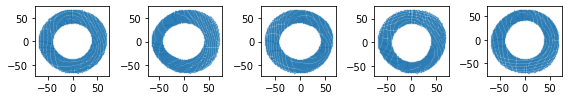

In [20]:

# Look at some spot diagrams
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 1.5))
for ax, (thx, thy) in zip(axes, [(0,0), (-1.5, 0), (1.5, 0), (0, -1.5), (0, 1.5)]):
    sx, sy = batoid.spot(
        telescope.withGloballyShiftedOptic("Detector", [0, 0, 0.0015]), 
        np.deg2rad(thx), np.deg2rad(thy), 
        bandpass.effective_wavelength*1e-9, 
        nx=128
    )
    ax.scatter(sx/pixel_scale, sy/pixel_scale, s=0.1, alpha=0.5)
plt.tight_layout()
plt.show()

In [4]:
# Show the results of  running 5 simulations

# get filenames of simulation files 
import os
files = os.listdir()
l = []
for file in files:
    if file.startswith('one_intra_and_extra_bending'):
        l.append(file)


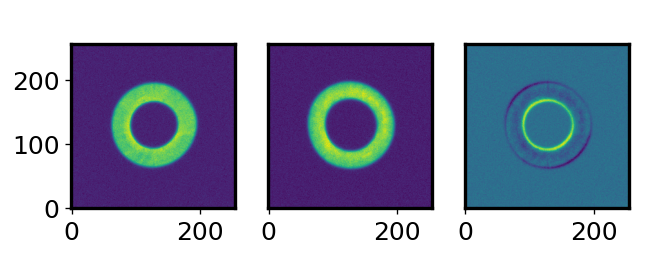

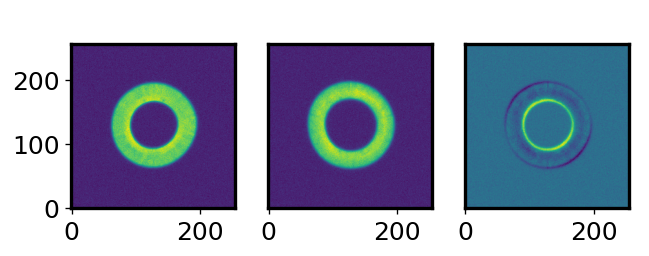

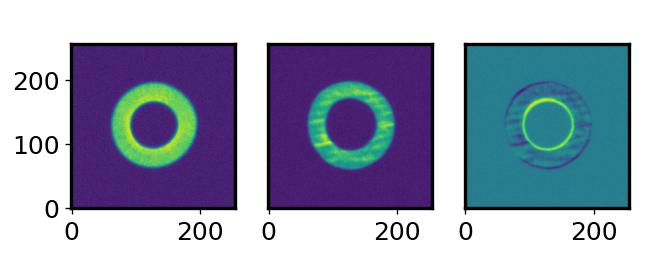

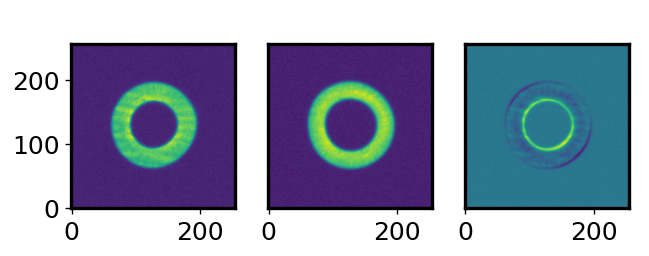

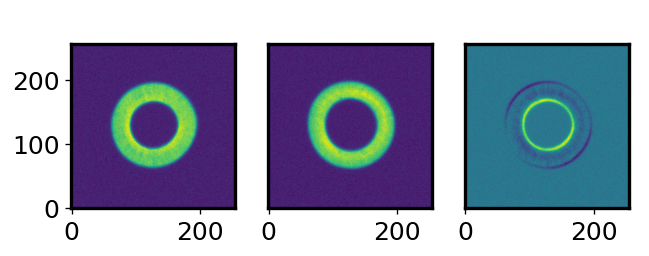

In [25]:
# plot the stored results
for f in l:
    npz = np.load(f)
    plot_intra_extra(npz['intra'],npz['extra'])

In [2]:
# CWFS setup common for all 
# CWFS
cwfsConfigDir = os.path.join(getConfigDir(), "cwfs")
instDir = os.path.join(cwfsConfigDir, "instData")
inst = Instrument(instDir)
algoDir = os.path.join(cwfsConfigDir, "algo")


Fit the simulations above (once with `develop`, then with `DM-34846` branch)

In [5]:
res =  {}
for f in l:
    res[f]={}
    npz = np.load(f)
    intra = npz['intra']
    extra = npz['extra']

    fieldXY = np.zeros(2)
    I1 = CompensableImage()
    I2 = CompensableImage()
    I1.setImg(fieldXY, DefocalType.Intra, image=intra.copy())
    I2.setImg(fieldXY, DefocalType.Extra, image=extra.copy())
    inst.config(CamType.LsstFamCam, I1.getImgSizeInPix(), announcedDefocalDisInMm=1.5)

    fftAlgo = Algorithm(algoDir)
    fftAlgo.config("fft", inst)
    fftAlgo.runIt(I1, I2, "offAxis", tol=1e-3)

    # There's probably a reset method somewhere, but it's fast enough to just
    # reconstruct these...
    I1 = CompensableImage()
    I2 = CompensableImage()
    I1.setImg(fieldXY, DefocalType.Intra, image=intra.copy())
    I2.setImg(fieldXY, DefocalType.Extra, image=extra.copy())
    inst.config(CamType.LsstFamCam, I1.getImgSizeInPix(), announcedDefocalDisInMm=1.5)

    expAlgo = Algorithm(algoDir)
    expAlgo.config("exp", inst)
    expAlgo.runIt(I1, I2, "offAxis", tol=1e-3)
    
    fft_zk = fftAlgo.getZer4UpInNm()
    exp_zk = expAlgo.getZer4UpInNm()

    res[f]['fft'] = fft_zk
    res[f]['exp'] = exp_zk

/project/scichris/aos/ts_wep/python/lsst/ts/wep/cwfs/Algorithm.py:940: RuntimeWarning: invalid value encountered in true_divide
  tmp /= convolve2d(ApringIn, kernel, mode="same")


In [6]:
#np.save('batoid_fit_develop_v2-4-4_pert.npy',res)
np.save('batoid_fit_DM-34846_pert.npy',res)



one_intra_and_extra_bending_7308.npz
fft diffMax=221.72185759743485
fft diffRms=72.40434329690693
exp diffMax=166.11092018095178
exp diffRms=51.429011141073104


one_intra_and_extra_bending_6400.npz
fft diffMax=243.0659912389931
fft diffRms=71.57184397959551
exp diffMax=160.53175590594395
exp diffRms=45.956002658707604


one_intra_and_extra_bending_778.npz
fft diffMax=318.7198832953226
fft diffRms=97.9826968161628
exp diffMax=222.06002102170447
exp diffRms=64.75622968750343


one_intra_and_extra_bending_460.npz
fft diffMax=282.47369446693756
fft diffRms=85.51162163833185
exp diffMax=177.09620825056402
exp diffRms=62.65339386987175


one_intra_and_extra_bending_9778.npz
fft diffMax=167.11212146263313
fft diffRms=56.3321033810498
exp diffMax=161.37258794458103
exp diffRms=49.37456455484666


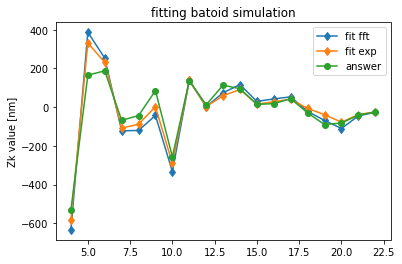

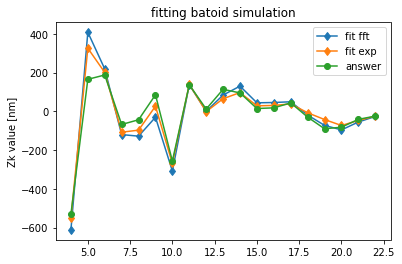

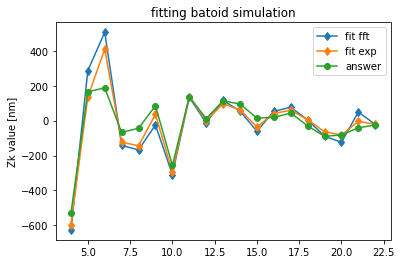

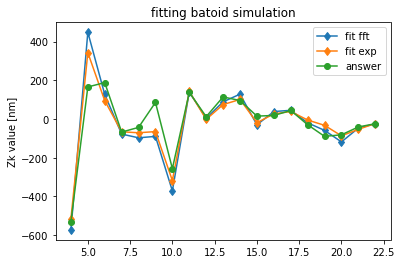

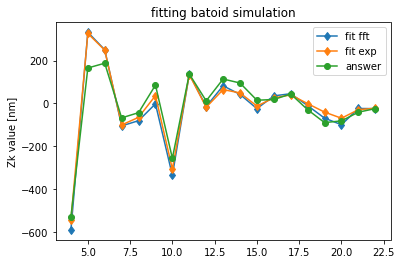

In [10]:
# plot the comparison "before" ...
res = np.load('batoid_fit_develop_v2-4-4_pert.npy', allow_pickle=True).item(
)
for f in l:
    npz = np.load(f)
    print('\n')
    print(f)
    compare(res[f] , npz['zernikes'][4:] )



one_intra_and_extra_bending_7308.npz
fft diffMax=231.86065124982105
fft diffRms=72.84973988493061
exp diffMax=166.11092018095178
exp diffRms=51.429011141073104


one_intra_and_extra_bending_6400.npz
fft diffMax=250.94300882566222
fft diffRms=71.80381297106567
exp diffMax=160.53175590594395
exp diffRms=45.956002658707604


one_intra_and_extra_bending_778.npz
fft diffMax=320.85913799411196
fft diffRms=96.39705082391137
exp diffMax=222.06002102170447
exp diffRms=64.75622968750343


one_intra_and_extra_bending_460.npz
fft diffMax=261.0213919439244
fft diffRms=81.12743631840826
exp diffMax=177.09620825056402
exp diffRms=62.65339386987175


one_intra_and_extra_bending_9778.npz
fft diffMax=231.82261016439764
fft diffRms=67.30827053279295
exp diffMax=161.37258794458103
exp diffRms=49.37456455484666


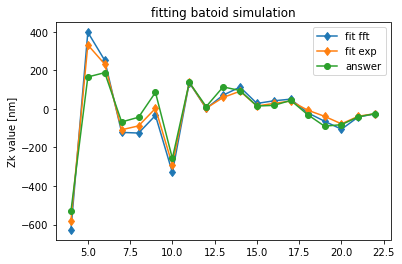

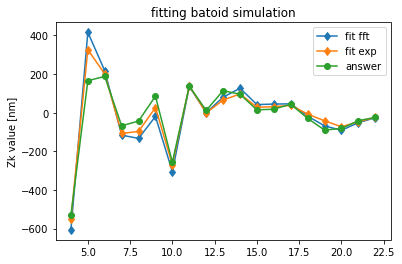

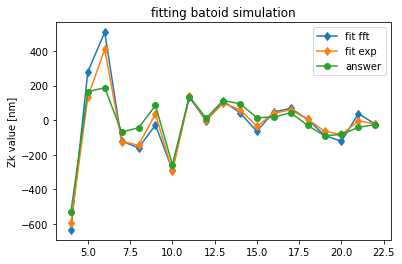

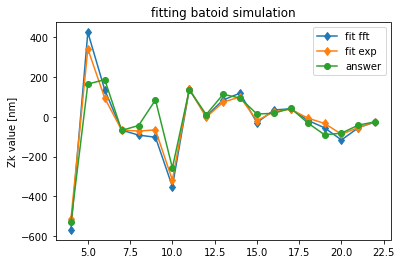

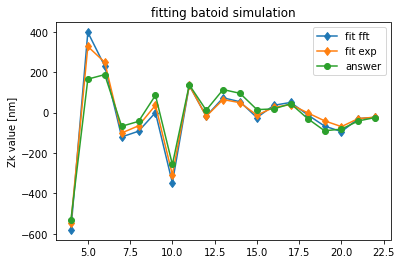

In [9]:
# ..  and "after"
res = np.load('batoid_fit_DM-34846_pert.npy', allow_pickle=True).item(
)
for f in l:
    npz = np.load(f)
    print('\n')
    print(f)
    compare(res[f] , npz['zernikes'][4:] )

summarize these plots by comparing only the `diffMax`, and `diffRms` as metrics for `before` and `after` changes, for both algorithms

In [17]:
diffs = {}
for f in l:
    npz = np.load(f)
    
    wfErrAns = npz['zernikes'][4:]
    
    resBefore = np.load('batoid_fit_develop_v2-4-4_pert.npy', allow_pickle=True).item()
    resAfter =  np.load('batoid_fit_DM-34846_pert.npy', allow_pickle=True).item()
    print('\n',f)
    diffs[f] = {}
    for algo in ['fft','exp']:
        diffs[f][algo] = {}
        for res, label in zip([resBefore, resAfter],['before','after']):
            diffs[f][algo][label] = {}
            wfErrFit = res[f][algo]                  
            diffMax = np.max(np.abs(wfErrFit - wfErrAns))
            diffRms = np.sqrt(np.sum(np.abs(wfErrFit - wfErrAns) ** 2) / len(wfErrFit))
            diffs[f][algo][label]['diffMax'] = diffMax
            diffs[f][algo][label]['diffRms'] = diffRms
#             print(f'{label} {algo} diffMax={diffMax}')
#             print(f'{label} {algo} diffRms={diffRms}')


 one_intra_and_extra_bending_7308.npz

 one_intra_and_extra_bending_6400.npz

 one_intra_and_extra_bending_778.npz

 one_intra_and_extra_bending_460.npz

 one_intra_and_extra_bending_9778.npz


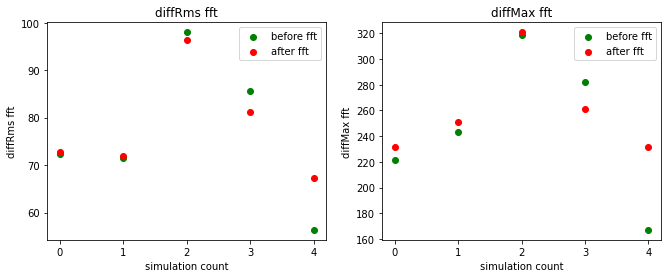

In [56]:
from matplotlib.ticker import MaxNLocator

fig,ax = plt.subplots(1,2,figsize=(11,4))

for diffType, col in zip(['Rms','Max'],[0,1]):
    sim = 0
    for f in diffs.keys():
        algo = 'fft'
        ax[col].scatter(sim, diffs[f][algo]['before'][f'diff{diffType}'], c='green', label=f'before {algo}')
        ax[col].scatter(sim, diffs[f][algo]['after'][f'diff{diffType}'], c='red', label=f'after {algo}')
        sim += 1 
    
    # get current legend and plot only the first two
    handles, labels = ax[col].get_legend_handles_labels()
    ax[col].legend(list(handles)[:2],list(labels)[:2])
    ax[col].set_title(f'diff{diffType} fft')
    ax[col].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[col].set_ylabel(f'diff{diffType} fft')
    ax[col].set_xlabel('simulation count')

So we see that of these 5 simulations, the results after change are  split - ~ half time they are better (smaller RMS difference between truth and result in sim 3 and 4), half the time worse. Would need to run many more simulations to investigate deeper. But since before the algorithm used non-padded mask instead of padded, it is not surprising that the difference only shows up for `fft`

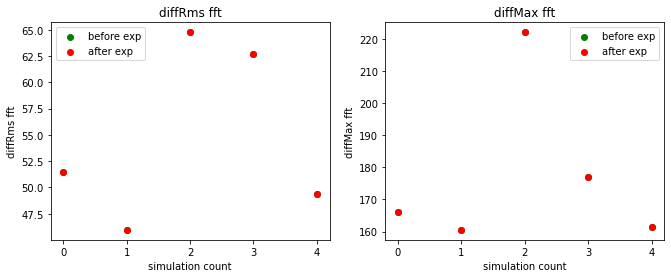

In [57]:
from matplotlib.ticker import MaxNLocator

fig,ax = plt.subplots(1,2,figsize=(11,4))

for diffType, col in zip(['Rms','Max'],[0,1]):
    sim = 0
    for f in diffs.keys():
        algo = 'exp'
        ax[col].scatter(sim, diffs[f][algo]['before'][f'diff{diffType}'], c='green', label=f'before {algo}')
        ax[col].scatter(sim, diffs[f][algo]['after'][f'diff{diffType}'], c='red', label=f'after {algo}')
        sim += 1 
    
    # get current legend and plot only the first two
    handles, labels = ax[col].get_legend_handles_labels()
    ax[col].legend(list(handles)[:2],list(labels)[:2])
    ax[col].set_title(f'diff{diffType} fft')
    ax[col].xaxis.set_major_locator(MaxNLocator(integer=True))
    ax[col].set_ylabel(f'diff{diffType} fft')
    ax[col].set_xlabel('simulation count')

( no change in exp since it does not employ padded masks...)